<a href="https://colab.research.google.com/github/wandersonxs/Financas-Machine-Learning-Course/blob/main/S5_Python_para_finan%C3%A7as_risco_de_a%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para finanças - risco de ações

## Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BANCO DO BRASIL,BOVA
0,2020-01-02,19.200001,17.010000,48.240002,30.700001,53.799999,114.239998
1,2020-01-03,18.930000,17.219999,48.799999,30.450001,53.709999,113.800003
2,2020-01-06,19.020000,17.090000,48.330002,30.809999,53.000000,112.589996
3,2020-01-07,19.059999,16.650000,49.400002,30.690001,52.599998,112.239998
4,2020-01-08,18.969999,16.700001,49.900002,30.500000,52.119999,111.949997
...,...,...,...,...,...,...,...
998,2024-01-09,13.620000,11.850000,50.230000,38.099998,54.520000,127.589996
999,2024-01-10,13.760000,11.980000,50.619999,37.750000,54.430000,126.940002
1000,2024-01-11,13.560000,11.960000,50.340000,38.070000,54.799999,126.809998
1001,2024-01-12,13.590000,12.000000,50.770000,38.169998,55.119999,127.230003


In [3]:
dataset.describe()

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BANCO DO BRASIL,BOVA
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,14.805494,12.226640,45.646171,27.496969,37.168345,106.154128
std,1.592240,2.022891,4.372464,5.052255,7.351430,11.306421
min,11.030000,8.130000,35.660000,11.290000,22.129999,61.139999
25%,13.715000,10.805000,42.155001,23.905000,31.790001,100.204998
50%,14.700000,12.330000,45.279999,27.850000,34.750000,107.720001
75%,15.590000,13.330000,49.225000,30.850000,41.725000,113.630001
max,19.600000,18.430000,56.740002,38.959999,56.009998,130.389999


## Cálculo dos retornos anuais

### 2020

In [10]:
# dataset.head(248)
dataset['AMBEV'][dataset['Date'] == '2020-01-02'], dataset['AMBEV'][dataset['Date'] == '2020-12-30']

(0    19.200001
 Name: AMBEV, dtype: float64,
 247    15.65
 Name: AMBEV, dtype: float64)

In [23]:
np.log(15.65 / 19.20) * 100

-20.443936204757353

In [13]:
dataset['ODONTOPREV'][dataset['Date'] == '2020-01-02'], dataset['ODONTOPREV'][dataset['Date'] == '2020-12-30']

(0    17.01
 Name: ODONTOPREV, dtype: float64,
 247    14.55
 Name: ODONTOPREV, dtype: float64)

In [59]:
np.log(14.55 / 17.01) * 100

-15.621041279026887

### 2021

In [21]:
dataset['AMBEV'][dataset['Date'] == '2021-01-04'], dataset['AMBEV'][dataset['Date'] == '2021-12-30']

(248    15.48
 Name: AMBEV, dtype: float64,
 494    15.42
 Name: AMBEV, dtype: float64)

In [25]:
np.log(15.42 / 15.48) * 100

-0.3883500026397633

In [26]:
dataset['ODONTOPREV'][dataset['Date'] == '2021-01-04'], dataset['ODONTOPREV'][dataset['Date'] == '2021-12-30']

(248    15.17
 Name: ODONTOPREV, dtype: float64,
 494    12.6
 Name: ODONTOPREV, dtype: float64)

In [27]:
np.log(12.6 / 15.17) * 100

-18.562297940300855

### 2022

In [32]:
dataset['AMBEV'][dataset['Date'] == '2022-01-03'], dataset['AMBEV'][dataset['Date'] == '2022-12-29']

(495    15.33
 Name: AMBEV, dtype: float64,
 744    14.52
 Name: AMBEV, dtype: float64)

In [33]:
np.log(14.52/ 15.33) * 100

-5.428468348707279

In [38]:
dataset['ODONTOPREV'][dataset['Date'] == '2022-01-03'], dataset['ODONTOPREV'][dataset['Date'] == '2022-12-29']

(495    12.22
 Name: ODONTOPREV, dtype: float64,
 744    9.03
 Name: ODONTOPREV, dtype: float64)

In [35]:
np.log(9.03 / 12.22) * 100

-30.252158631455533

### 2023

In [51]:
dataset['AMBEV'][dataset['Date'] == '2023-01-02'], dataset['AMBEV'][dataset['Date'] == '2023-12-28']

(745    14.19
 Name: AMBEV, dtype: float64,
 992    13.73
 Name: AMBEV, dtype: float64)

In [52]:
np.log(13.73 / 14.19) * 100

-3.2954271392071495

In [47]:
dataset['ODONTOPREV'][dataset['Date'] == '2023-01-02'], dataset['ODONTOPREV'][dataset['Date'] == '2023-12-28']

(745    8.89
 Name: ODONTOPREV, dtype: float64,
 992    11.62
 Name: ODONTOPREV, dtype: float64)

In [60]:
np.log(11.62 / 8.89) * 100

26.78007018979519

## Variância

In [53]:
taxas_ambev = np.array([-20.44, -0.38, -5.42, -3.29])

In [54]:
media_ambev = taxas_ambev.sum() / len(taxas_ambev)
media_ambev

-7.3825

In [56]:
media_ambev = taxas_ambev.mean()
media_ambev

-7.3825

In [57]:
((taxas_ambev - media_ambev) ** 2).sum() / len(taxas_ambev)

60.03331875000001

In [58]:
variancia_ambev = taxas_ambev.var()
variancia_ambev

60.03331875000001

In [61]:
taxas_odontoprev = np.array([-15.62, -18.56, -30.25, 26.78 ])

In [62]:
variancia_odontoprev = taxas_odontoprev.var()
variancia_odontoprev

466.57706874999997

In [65]:
dataset['AMBEV'].tail(330).var(), dataset['ODONTOPREV'].tail(330).var()

(0.8494784366570695, 1.6159596815910717)

## Desvio padrão

In [66]:
desvio_padrao_ambev = math.sqrt(variancia_ambev)
desvio_padrao_ambev

7.74811710998227

In [67]:
taxas_ambev.std()

7.74811710998227

In [68]:
desvio_padrao_odontoprev = math.sqrt(variancia_odontoprev)
desvio_padrao_odontoprev

21.60039510634007

In [69]:
taxas_odontoprev.std()

21.60039510634007

In [70]:
dataset['AMBEV'].tail(330).std(), dataset['ODONTOPREV'].tail(330).std()

(0.921671544888454, 1.2712040283098036)

## Coeficiente de variação

In [71]:
desvio_padrao_ambev, media_ambev

(7.74811710998227, -7.3825)

In [72]:
coeficiente_variacao_ambev = (desvio_padrao_ambev / media_ambev) * 100
coeficiente_variacao_ambev

-104.95248371123968

In [73]:
stats.variation(taxas_ambev) * 100

-104.95248371123968

In [74]:
stats.variation(taxas_odontoprev) * 100

-229.4862693900671

## Cálculos com todas as ações - risco médio anual

In [75]:
dataset.drop(labels = ['Date'], axis=1, inplace=True)
dataset

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BANCO DO BRASIL,BOVA
0,19.200001,17.010000,48.240002,30.700001,53.799999,114.239998
1,18.930000,17.219999,48.799999,30.450001,53.709999,113.800003
2,19.020000,17.090000,48.330002,30.809999,53.000000,112.589996
3,19.059999,16.650000,49.400002,30.690001,52.599998,112.239998
4,18.969999,16.700001,49.900002,30.500000,52.119999,111.949997
...,...,...,...,...,...,...
998,13.620000,11.850000,50.230000,38.099998,54.520000,127.589996
999,13.760000,11.980000,50.619999,37.750000,54.430000,126.940002
1000,13.560000,11.960000,50.340000,38.070000,54.799999,126.809998
1001,13.590000,12.000000,50.770000,38.169998,55.119999,127.230003


In [76]:
taxas_retorno = (dataset / dataset.shift(1)) - 1
taxas_retorno

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BANCO DO BRASIL,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.014063,0.012346,0.011609,-0.008143,-0.001673,-0.003851
2,0.004754,-0.007549,-0.009631,0.011823,-0.013219,-0.010633
3,0.002103,-0.025746,0.022139,-0.003895,-0.007547,-0.003109
4,-0.004722,0.003003,0.010121,-0.006191,-0.009125,-0.002584
...,...,...,...,...,...,...
998,-0.006565,-0.037368,0.004600,-0.008587,-0.014995,-0.007622
999,0.010279,0.010970,0.007764,-0.009186,-0.001651,-0.005094
1000,-0.014535,-0.001669,-0.005531,0.008477,0.006798,-0.001024
1001,0.002212,0.003344,0.008542,0.002627,0.005839,0.003312


In [77]:
taxas_retorno.std() * 100

AMBEV              2.022324
ODONTOPREV         2.258812
VIVO               1.776434
PETROBRAS          3.133338
BANCO DO BRASIL    2.537737
BOVA               1.778403
dtype: float64

In [78]:
taxas_retorno.std() * 246

AMBEV              4.974917
ODONTOPREV         5.556678
VIVO               4.370027
PETROBRAS          7.708011
BANCO DO BRASIL    6.242832
BOVA               4.374871
dtype: float64

In [79]:
math.sqrt(246) # Anualizar

15.684387141358123

In [80]:
taxas_retorno.std() * math.sqrt(246)

AMBEV              0.317189
ODONTOPREV         0.354281
VIVO               0.278623
PETROBRAS          0.491445
BANCO DO BRASIL    0.398028
BOVA               0.278932
dtype: float64

## Correlação entre ações

In [81]:
dataset

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BANCO DO BRASIL,BOVA
0,19.200001,17.010000,48.240002,30.700001,53.799999,114.239998
1,18.930000,17.219999,48.799999,30.450001,53.709999,113.800003
2,19.020000,17.090000,48.330002,30.809999,53.000000,112.589996
3,19.059999,16.650000,49.400002,30.690001,52.599998,112.239998
4,18.969999,16.700001,49.900002,30.500000,52.119999,111.949997
...,...,...,...,...,...,...
998,13.620000,11.850000,50.230000,38.099998,54.520000,127.589996
999,13.760000,11.980000,50.619999,37.750000,54.430000,126.940002
1000,13.560000,11.960000,50.340000,38.070000,54.799999,126.809998
1001,13.590000,12.000000,50.770000,38.169998,55.119999,127.230003


In [82]:
taxas_retorno

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BANCO DO BRASIL,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.014063,0.012346,0.011609,-0.008143,-0.001673,-0.003851
2,0.004754,-0.007549,-0.009631,0.011823,-0.013219,-0.010633
3,0.002103,-0.025746,0.022139,-0.003895,-0.007547,-0.003109
4,-0.004722,0.003003,0.010121,-0.006191,-0.009125,-0.002584
...,...,...,...,...,...,...
998,-0.006565,-0.037368,0.004600,-0.008587,-0.014995,-0.007622
999,0.010279,0.010970,0.007764,-0.009186,-0.001651,-0.005094
1000,-0.014535,-0.001669,-0.005531,0.008477,0.006798,-0.001024
1001,0.002212,0.003344,0.008542,0.002627,0.005839,0.003312


In [83]:
taxas_retorno.cov()

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BANCO DO BRASIL,BOVA
AMBEV,0.000409,0.000094,0.000139,0.000246,0.000252,0.000217
ODONTOPREV,0.000094,0.000510,0.000098,0.000168,0.000161,0.000150
VIVO,0.000139,0.000098,0.000316,0.000161,0.000169,0.000147
PETROBRAS,0.000246,0.000168,0.000161,0.000982,0.000492,0.000394
BANCO DO BRASIL,0.000252,0.000161,0.000169,0.000492,0.000644,0.000358
BOVA,0.000217,0.000150,0.000147,0.000394,0.000358,0.000316


In [84]:
# Empresas BOVA: http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraQuadrimestre.aspx?Indice=IBOV&idioma=pt-br
taxas_retorno.corr()

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BANCO DO BRASIL,BOVA
AMBEV,1.000000,0.205036,0.387269,0.388424,0.491199,0.602952
ODONTOPREV,0.205036,1.000000,0.244082,0.236744,0.280760,0.372354
VIVO,0.387269,0.244082,1.000000,0.288644,0.373793,0.464297
PETROBRAS,0.388424,0.236744,0.288644,1.000000,0.619342,0.707454
BANCO DO BRASIL,0.491199,0.280760,0.373793,0.619342,1.000000,0.794083
BOVA,0.602952,0.372354,0.464297,0.707454,0.794083,1.000000


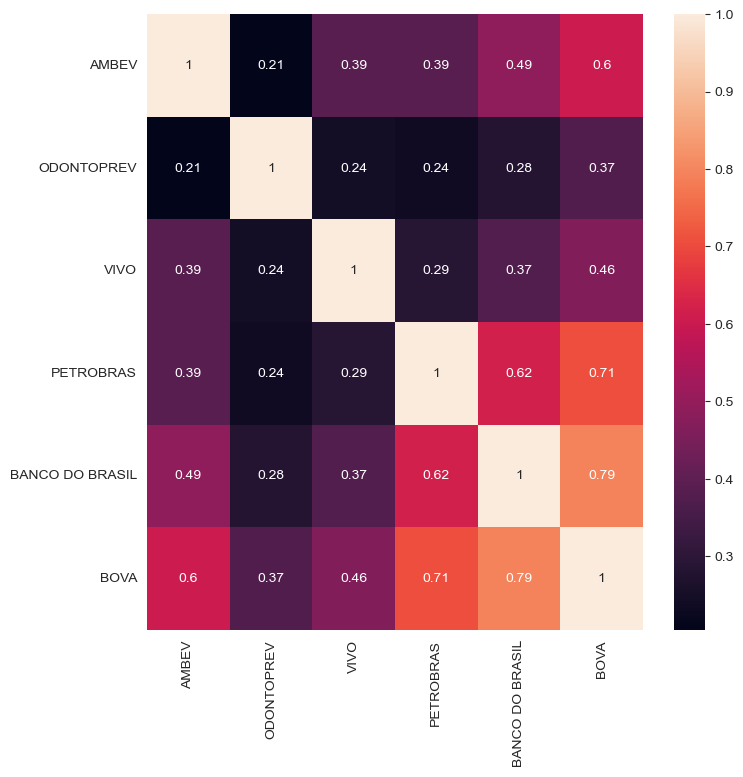

In [85]:
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno.corr(), annot=True);

## Risco de um portfólio

### Somente duas ações

In [86]:
taxas_retorno

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BANCO DO BRASIL,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.014063,0.012346,0.011609,-0.008143,-0.001673,-0.003851
2,0.004754,-0.007549,-0.009631,0.011823,-0.013219,-0.010633
3,0.002103,-0.025746,0.022139,-0.003895,-0.007547,-0.003109
4,-0.004722,0.003003,0.010121,-0.006191,-0.009125,-0.002584
...,...,...,...,...,...,...
998,-0.006565,-0.037368,0.004600,-0.008587,-0.014995,-0.007622
999,0.010279,0.010970,0.007764,-0.009186,-0.001651,-0.005094
1000,-0.014535,-0.001669,-0.005531,0.008477,0.006798,-0.001024
1001,0.002212,0.003344,0.008542,0.002627,0.005839,0.003312


In [87]:
taxas_retorno_ambev_odontoprev = taxas_retorno.drop(columns = ['VIVO', 'PETROBRAS', 'BANCO DO BRASIL', 'BOVA'])
taxas_retorno_ambev_odontoprev

,AMBEV,ODONTOPREV
0,NaN,NaN
1,-0.014063,0.012346
2,0.004754,-0.007549
3,0.002103,-0.025746
4,-0.004722,0.003003
...,...,...
998,-0.006565,-0.037368
999,0.010279,0.010970
1000,-0.014535,-0.001669
1001,0.002212,0.003344


In [88]:
taxas_retorno_ambev_odontoprev.cov()

,AMBEV,ODONTOPREV
AMBEV,0.000409,0.000094
ODONTOPREV,0.000094,0.000510


In [89]:
taxas_retorno_ambev_odontoprev.cov() * 246

,AMBEV,ODONTOPREV
AMBEV,0.100609,0.023041
ODONTOPREV,0.023041,0.125515


In [90]:
pesos = np.array([0.5, 0.5])

In [91]:
np.dot(taxas_retorno_ambev_odontoprev.cov() * 246, pesos)

array([0.06182484, 0.07427783])

In [92]:
np.dot(pesos, np.dot(taxas_retorno_ambev_odontoprev.cov() * 246, pesos))

0.0680513358852508

In [93]:
math.sqrt(np.dot(pesos, np.dot(taxas_retorno_ambev_odontoprev.cov() * 246, pesos))) * 100

26.08665097041987

### Todas as ações

In [94]:
dataset.columns

Index(['AMBEV', 'ODONTOPREV', 'VIVO', 'PETROBRAS', 'BANCO DO BRASIL', 'BOVA'], dtype='object')

In [95]:
pesos1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])

In [96]:
pesos1.sum()

1.0

In [97]:
taxas_retorno.cov() * 246

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BANCO DO BRASIL,BOVA
AMBEV,0.100609,0.023041,0.034225,0.060548,0.062014,0.053346
ODONTOPREV,0.023041,0.125515,0.024094,0.041219,0.039591,0.036796
VIVO,0.034225,0.024094,0.077631,0.039523,0.041454,0.036084
PETROBRAS,0.060548,0.041219,0.039523,0.241518,0.121149,0.096977
BANCO DO BRASIL,0.062014,0.039591,0.041454,0.121149,0.158427,0.088161
BOVA,0.053346,0.036796,0.036084,0.096977,0.088161,0.077803


In [98]:
np.dot(taxas_retorno.cov() * 246, pesos1)

array([0.05608739, 0.05069195, 0.0433853 , 0.10079154, 0.08452682,
       0.0622728 ])

In [99]:
variancia_portfolio1 = np.dot(pesos1, np.dot(taxas_retorno.cov() * 246, pesos1))
variancia_portfolio1

0.06709660044292025

In [101]:
volatilidade_portfolio1 = math.sqrt(variancia_portfolio1)
volatilidade_portfolio1 * 100

25.90301149343841

In [102]:
pesos2 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0])

In [104]:
variancia_portfolio2 = np.dot(pesos2, np.dot(taxas_retorno.cov() * 246, pesos2))
variancia_portfolio2 

0.0778028292567613

In [105]:
volatilidade_portfolio2 = math.sqrt(variancia_portfolio2)
volatilidade_portfolio2 * 100

27.893158526198015

## Risco sistemático e não sistemático

- Risco sistemático: mudança diária no preço das ações, devido a eventos como recessão da economia, comportamento do cliente (eventos externos). Não pode ser eliminado e pode afetar todas as empresas
- Risco não sistemático: Eventos específicos na empresa (depende do tipo de empresa)

In [106]:
taxas_retorno

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BANCO DO BRASIL,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.014063,0.012346,0.011609,-0.008143,-0.001673,-0.003851
2,0.004754,-0.007549,-0.009631,0.011823,-0.013219,-0.010633
3,0.002103,-0.025746,0.022139,-0.003895,-0.007547,-0.003109
4,-0.004722,0.003003,0.010121,-0.006191,-0.009125,-0.002584
...,...,...,...,...,...,...
998,-0.006565,-0.037368,0.004600,-0.008587,-0.014995,-0.007622
999,0.010279,0.010970,0.007764,-0.009186,-0.001651,-0.005094
1000,-0.014535,-0.001669,-0.005531,0.008477,0.006798,-0.001024
1001,0.002212,0.003344,0.008542,0.002627,0.005839,0.003312


In [107]:
pesos1

array([0.2, 0.2, 0.2, 0.2, 0.2, 0. ])

In [108]:
pesos2

array([0., 0., 0., 0., 0., 1.])

In [109]:
taxas_retorno.var() * 246

AMBEV              0.100609
ODONTOPREV         0.125515
VIVO               0.077631
PETROBRAS          0.241518
BANCO DO BRASIL    0.158427
BOVA               0.077803
dtype: float64

In [110]:
variancia_pesos1 = (taxas_retorno.var() * 246) * pesos1
variancia_pesos1

AMBEV              0.020122
ODONTOPREV         0.025103
VIVO               0.015526
PETROBRAS          0.048304
BANCO DO BRASIL    0.031685
BOVA               0.000000
dtype: float64

In [111]:
sub1 = - variancia_pesos1[0] - variancia_pesos1[1] - variancia_pesos1[2] - variancia_pesos1[3] - variancia_pesos1[4] - variancia_pesos1[5] #Atualizado: 02/05/2021
sub1

-0.1407398306857708

In [114]:
variancia_portfolio1

0.06709660044292025

In [116]:
risco_nao_sistematico1 = (variancia_portfolio1 - sub1)
risco_nao_sistematico1

0.20783643112869105

In [115]:
variancia_pesos2 = (taxas_retorno.var() * 246) * pesos2
variancia_pesos2

AMBEV              0.000000
ODONTOPREV         0.000000
VIVO               0.000000
PETROBRAS          0.000000
BANCO DO BRASIL    0.000000
BOVA               0.077803
dtype: float64

In [117]:
sub2 = variancia_pesos2[0] - variancia_pesos2[1] - variancia_pesos2[2] - variancia_pesos2[3] - variancia_pesos2[4] - variancia_pesos2[5]
sub2

-0.07780282925676144

In [118]:
variancia_portfolio2

0.0778028292567613

In [119]:
risco_nao_sistematico2 = (variancia_portfolio2 - sub2)
risco_nao_sistematico2

0.15560565851352273

## Exercício

In [127]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BANCO DO BRASIL,BOVA
0,2020-01-02,19.200001,17.010000,48.240002,30.700001,53.799999,114.239998
1,2020-01-03,18.930000,17.219999,48.799999,30.450001,53.709999,113.800003
2,2020-01-06,19.020000,17.090000,48.330002,30.809999,53.000000,112.589996
3,2020-01-07,19.059999,16.650000,49.400002,30.690001,52.599998,112.239998
4,2020-01-08,18.969999,16.700001,49.900002,30.500000,52.119999,111.949997
...,...,...,...,...,...,...,...
998,2024-01-09,13.620000,11.850000,50.230000,38.099998,54.520000,127.589996
999,2024-01-10,13.760000,11.980000,50.619999,37.750000,54.430000,126.940002
1000,2024-01-11,13.560000,11.960000,50.340000,38.070000,54.799999,126.809998
1001,2024-01-12,13.590000,12.000000,50.770000,38.169998,55.119999,127.230003


In [128]:
dataset.drop(labels=['Date'], axis = 1, inplace = True)
dataset.head()

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BANCO DO BRASIL,BOVA
0,19.200001,17.010000,48.240002,30.700001,53.799999,114.239998
1,18.930000,17.219999,48.799999,30.450001,53.709999,113.800003
2,19.020000,17.090000,48.330002,30.809999,53.000000,112.589996
3,19.059999,16.650000,49.400002,30.690001,52.599998,112.239998
4,18.969999,16.700001,49.900002,30.500000,52.119999,111.949997


In [129]:
taxas_retorno = (dataset / dataset.shift(1)) - 1
taxas_retorno

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BANCO DO BRASIL,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.014063,0.012346,0.011609,-0.008143,-0.001673,-0.003851
2,0.004754,-0.007549,-0.009631,0.011823,-0.013219,-0.010633
3,0.002103,-0.025746,0.022139,-0.003895,-0.007547,-0.003109
4,-0.004722,0.003003,0.010121,-0.006191,-0.009125,-0.002584
...,...,...,...,...,...,...
998,-0.006565,-0.037368,0.004600,-0.008587,-0.014995,-0.007622
999,0.010279,0.010970,0.007764,-0.009186,-0.001651,-0.005094
1000,-0.014535,-0.001669,-0.005531,0.008477,0.006798,-0.001024
1001,0.002212,0.003344,0.008542,0.002627,0.005839,0.003312


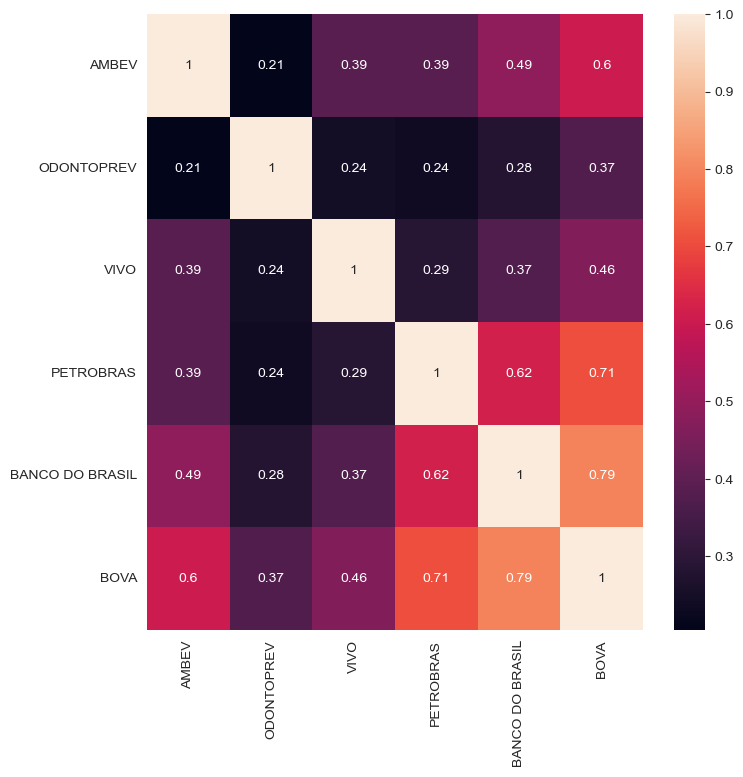

In [130]:
# Empresas BOVA: http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraQuadrimestre.aspx?Indice=IBOV&idioma=pt-br
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno.corr(), annot=True);

In [131]:
taxas_retorno.std() * math.sqrt(246) # Anualizado

AMBEV              0.317189
ODONTOPREV         0.354281
VIVO               0.278623
PETROBRAS          0.491445
BANCO DO BRASIL    0.398028
BOVA               0.278932
dtype: float64

In [132]:
pesos1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])

In [133]:
variancia_portfolio1 = np.dot(pesos1, np.dot(taxas_retorno.cov() * 246, pesos1))
variancia_portfolio1

0.06709660044292025

In [134]:
volatidade_portfolio1 = math.sqrt(np.dot(pesos1, np.dot(taxas_retorno.cov() * 246, pesos1)))
volatidade_portfolio1

0.2590301149343841

In [135]:
variancia_acoes1 = (taxas_retorno.var() * 246) * pesos1
sub = variancia_acoes1[0] - variancia_acoes1[1] - variancia_acoes1[2] - variancia_acoes1[3] - variancia_acoes1[4] - variancia_acoes1[5]
risco_nao_sistematico1 = (variancia_portfolio1 - sub)
risco_nao_sistematico1

0.16759285847302846

In [136]:
pesos2 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0])

In [137]:
variancia_portfolio2 = np.dot(pesos2, np.dot(taxas_retorno.cov() * 246, pesos2))
variancia_portfolio2

0.0778028292567613

In [138]:
volatidade_portfolio2 = math.sqrt(np.dot(pesos2, np.dot(taxas_retorno.cov() * 246, pesos2)))
volatidade_portfolio2

0.27893158526198014

In [139]:
variancia_acoes2 = (taxas_retorno.var() * 246) * pesos2
sub = variancia_acoes2[0] - variancia_acoes2[1] - variancia_acoes2[2] - variancia_acoes2[3] - variancia_acoes2[4] - variancia_acoes2[5]
risco_nao_sistematico2 = (variancia_portfolio2 - sub)
risco_nao_sistematico2

0.15560565851352273